<a href="https://colab.research.google.com/github/gisleinemoreno/data_science/blob/main/Indian_Unicorn_startups_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Indian Unicorn startups**

Referência: https://www.kaggle.com/datasets/mlvprasad/indian-unicorn-startups-2023-june-updated









De acordo com os  dados disponíveis na Kaggle, foi coletado o arquivo informação de crescimento de startups indianas ao longo dos anos, o arquivo CSV (Comma-Separated Values) abrange um cennário atualizado do unicórnio indiano. Com esclarecimento do progresso, financiamento e impacto na economia.

O termo "unicórnio" refere-se a startups de capital fechado que atingiram uma avaliação de US$ 1 bilhão ou mais.

Ao examinar o arquivo CSV, obtém-se os seguintes detalhes, tais como, nome da empresa, setor, ano de fundação, localização, avaliação e investidores notáveis. Este conjunto de dados abrangente capacita os usuários a **realizar análises aprofundadas, identificar tendências emergentes e tomar decisões informadas sobre investimentos, parcerias e colaborações**.

O arquivo CSV não apenas destaca as histórias de sucesso de conhecidas startups de unicórnios indianos, mas também chama a atenção para empreendimentos menos conhecidos, mas promissores, que estão fazendo progressos significativos. Ele mostra os diversos setores em que esses unicórnios operam, incluindo e-commerce, fintech, healthtech, edtech, transporte e muitos mais. Uma representação tão ampla ilustra a amplitude e a profundidade do ecossistema de startups indiano e sua capacidade de atender a uma ampla gama de necessidades do consumidor.

O Objetivo deste estudo, é apresentar a previsão de lucro futura para os investidores.


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#**Dicionário de dados**:

**Company**: nomes das startups de unicórnios indianos.
Sector: categoriza cada startup com base na indústria ou setor em que atua.

**Entry Valuation^^ ($B)**: avaliação da empresa no momento da entrada no clube unicórnio.

**Valuation ($B)**: avaliação atual da empresa, também medida em bilhões de dólares.

**Entry**: o ano em que a respectiva startup entrou no clube unicórnio
Location: é a localização geográfica ou a cidade onde a startup está sediada.

**Select Investors**: a coluna de investidores selecionados lista os investidores notáveis ​​que investiram na respectiva startup. Inclui capital de risco.

In [ ]:
df = pd.read_csv('/content/sample_data/IndianUnicornstartups2023.csv')
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


# Renomeando o nome das colunas

In [ ]:
df=df.rename(columns={'Entry Valuation^^ ($B)': 'EntryValuation($B)',
                   'Valuation ($B)': 'Valuation($B)'})


In [ ]:
df.head()

,No.,Company,Sector,EntryValuation($B),Valuation($B),Entry,Location,Select Investors,Indian_Location
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida


Tratando a coluna data para fazer a previsão para o ano seguinte

In [ ]:
df['Entry'] = pd.to_datetime(df['Entry'])

In [ ]:
df['Ano'] = df['Entry'].dt.year

In [ ]:
df.head()

,No.,Company,Sector,EntryValuation($B),Valuation($B),Entry,Location,Select Investors,Indian_Location,Profit/Loss,Ano
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore,0.0,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore,36.6,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,2013-02-01,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore,0.5,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,2014-10-01,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi,0.6,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,2015-02-01,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida,14.3,2015


In [ ]:
df.isnull().sum()

No.                   0
Company               0
Sector                0
EntryValuation($B)    0
Valuation($B)         0
Entry                 0
Location              0
Select Investors      0
Indian_Location       0
Profit/Loss           0
Ano                   0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   No.                 102 non-null    int64         
 1   Company             102 non-null    object        
 2   Sector              102 non-null    object        
 3   EntryValuation($B)  102 non-null    float64       
 4   Valuation($B)       102 non-null    float64       
 5   Entry               102 non-null    datetime64[ns]
 6   Location            102 non-null    object        
 7   Select Investors    102 non-null    object        
 8   Indian_Location     102 non-null    object        
 9   Profit/Loss         102 non-null    float64       
 10  Ano                 102 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 8.9+ KB


#**Resumo estatístico das colunas**

In [ ]:
df.describe()

,No.,EntryValuation($B),Valuation($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


#**LOCALIZAÇÃO**

In [ ]:
Loc = df['Location'].str.split("/")


In [ ]:
df['Indian_Location'] = Loc.str[0]

In [ ]:
df.head()

,No.,Company,Sector,EntryValuation($B),Valuation($B),Entry,Location,Select Investors,Indian_Location
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida


#**LUCRO**



In [ ]:
df['Profit/Loss'] = df['Valuation($B)'] - df['EntryValuation($B)']

In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Indian_Location
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida


De acordo com o resultado, pode ser observado que não houve prejuízo nos lucros e sim, aumentos dos lucros em relação ao investido inicialmente.

# **Tratamento da coluna DATA**




In [ ]:
Entry_year = df['Entry'].str.split("/")

In [ ]:
df.head()


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Indian_Location
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida


In [ ]:
# Count the number of unicorn startups in each sector
sector_counts = df['Sector'].value_counts()
print(sector_counts)

Edtech                                      5
Marketplace - Used Cars                     4
E-Commerce                                  4
Logistics Services                          4
Gaming                                      3
                                           ..
Fintech - Payments & Credit Card Rewards    1
E-Commerce - Online Pharmacy                1
Fintech - Brokerage & Mutual Funds          1
Social Media                                1
Healthtech - Diagnostics                    1
Name: Sector, Length: 75, dtype: int64


## **Visualização dos Dados**

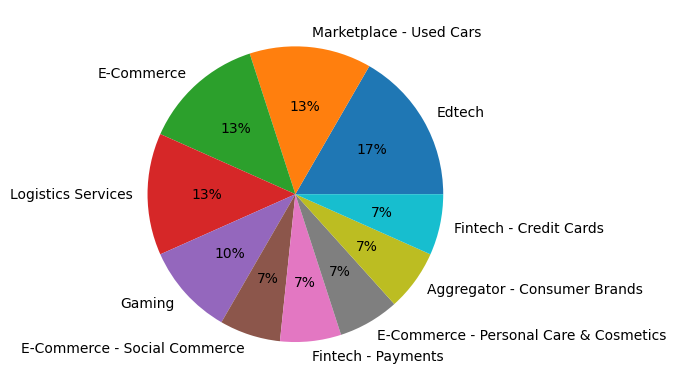

In [ ]:
plt.pie((df['Sector'].value_counts())[:10], labels=(df['Sector'].value_counts().index)[:10], autopct="%1.f%%")
plt.show()

In [ ]:
df.head()


,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Indian_Location
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida


#Tratamento de valores duplicados e ausentes

In [ ]:
df[df.duplicated(keep = False)]

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Indian_Location


In [ ]:
# Verifica se há valor ausente
df.isnull().values.any()

False

In [ ]:
# Verifica quantas colunas tem valor ausente
df.isnull().values.any().sum()

0

In [ ]:
# Lista os valores ausentes
df[df.isnull().values]

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Indian_Location


#**Pré-Processamento de Dados Para Construção de Modelos de Machine Learning**

In [ ]:
# Calculate the median valuation by sector

median_valuation_by_sector = df.groupby('Sector')['Valuation($B)'].median()
print(median_valuation_by_sector)

Sector
Adtech - Mobile Ads                         1.00
Aggregator - Consumer Brands                1.15
Aggregator - Logistics Services             1.23
B2B E-Commerce                              3.10
B2B E-Commerce - Construction Materials     2.50
                                           ...  
SaaS - Software Testing                     4.00
SaaS - Subscription Billing Solution        3.50
Social Media                                4.90
Social Media - Messaging                    1.40
Web3 Infrastructure - Dapps                10.00
Name: Valuation($B), Length: 75, dtype: float64


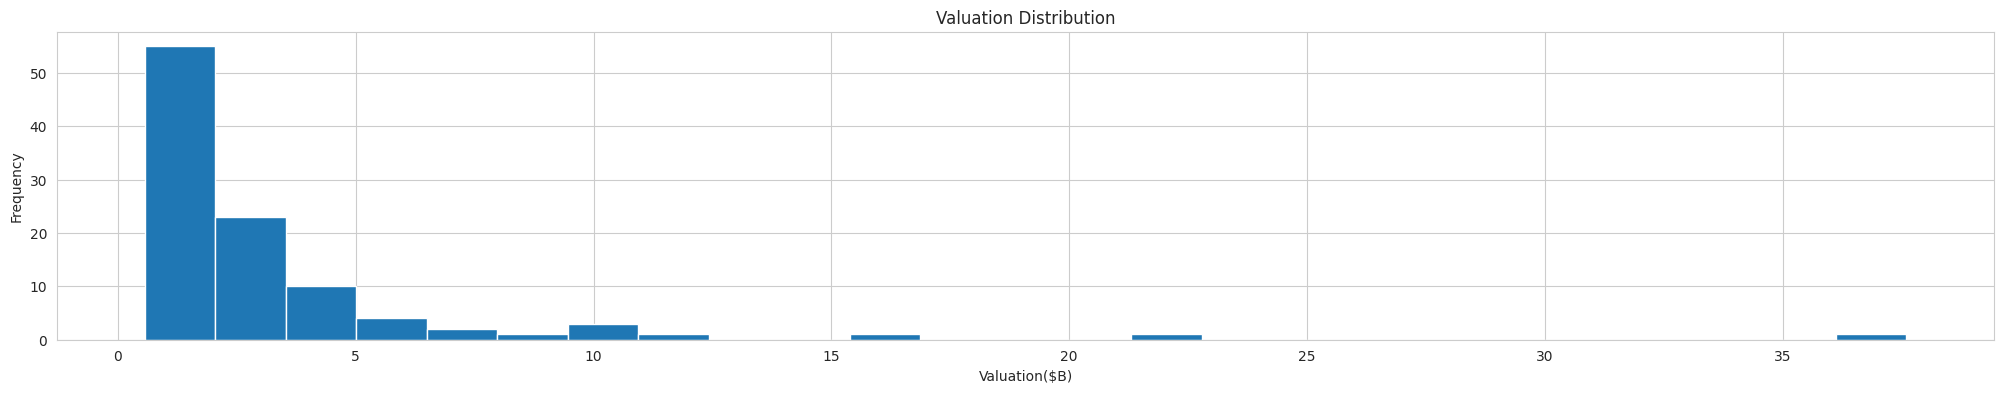

In [ ]:
# Plot a histogram of the valuation distribution

plt.figure(figsize=(25, 4))
plt.title('Valuation Distribution')
plt.hist(df['Valuation($B)'], bins=25)
plt.xlabel('Valuation($B)')
plt.ylabel('Frequency')
plt.show()

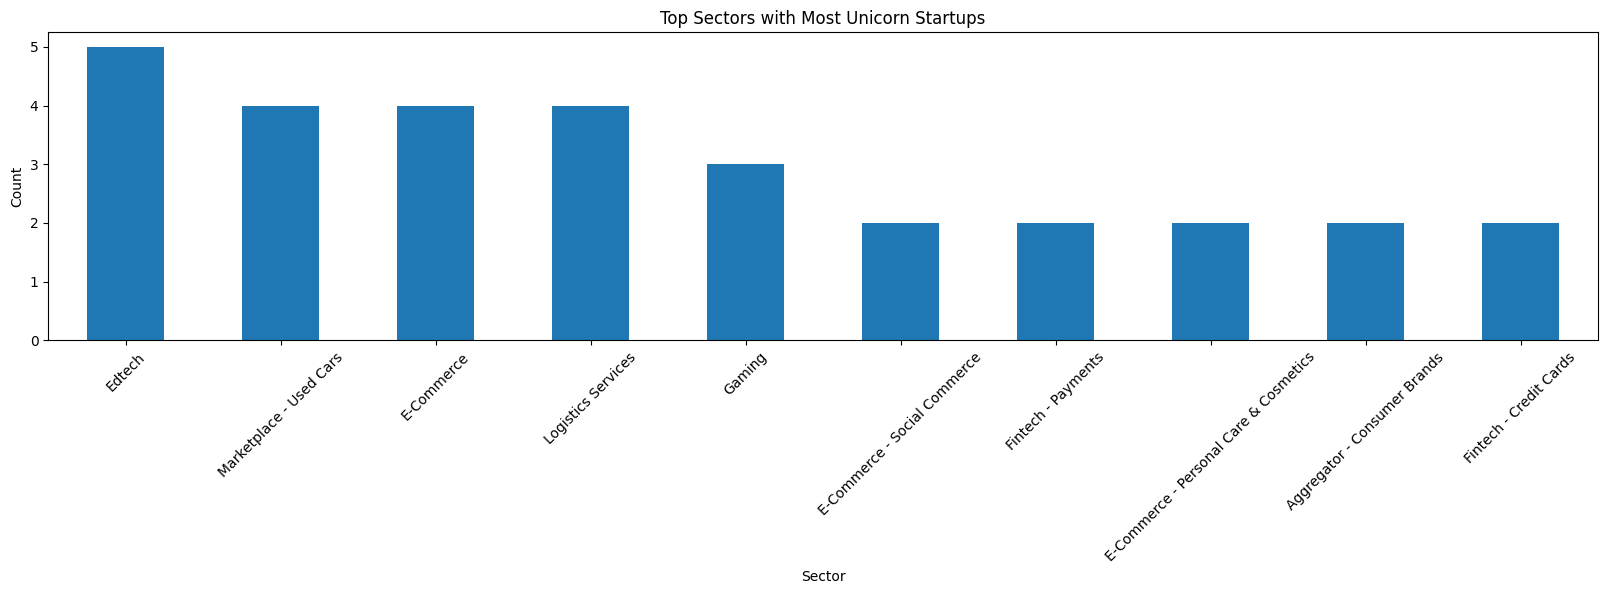

In [ ]:
# Plot a bar chart of the top sectors with the most unicorn startups


top_sector_counts = sector_counts.head(10)
plt.figure(figsize=(20, 4))
top_sector_counts.plot(kind='bar')
plt.title('Top Sectors with Most Unicorn Startups')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Correlação entre as variáveis

In [ ]:
df.corr()

,No.,EntryValuation($B),Valuation($B),Profit/Loss
No.,1.000000,0.056518,-0.406902,-0.431542
EntryValuation($B),0.056518,1.000000,0.224823,-0.017197
Valuation($B),-0.406902,0.224823,1.000000,0.970389
Profit/Loss,-0.431542,-0.017197,0.970389,1.000000


<Figure size 1600x1000 with 0 Axes>

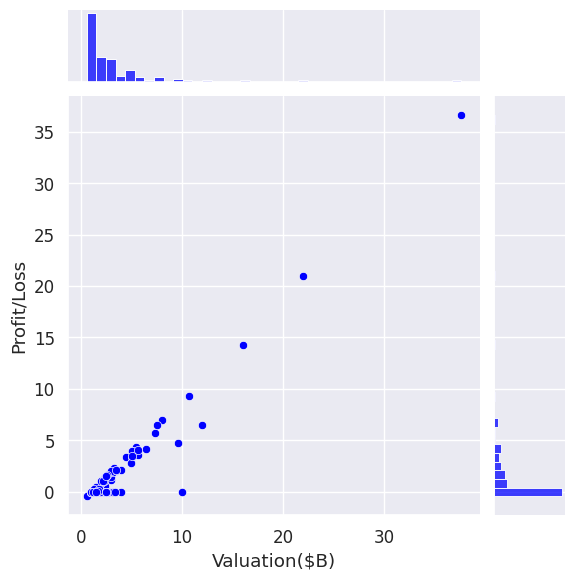

In [ ]:
# Plot
plt.figure(figsize = (16, 10))
sns.set(font_scale = 1.1)
sns.jointplot(data = df, x = 'Valuation($B)', y = 'Profit/Loss', color = 'blue')

<Figure size 2000x1400 with 0 Axes>

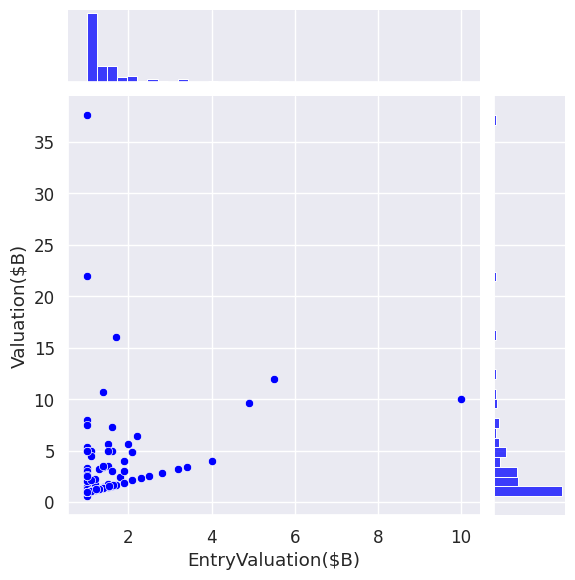

In [ ]:
# Plot
plt.figure(figsize = (20, 14))
sns.set(font_scale = 1.1)
sns.jointplot(data = df, x = 'EntryValuation($B)', y = 'Valuation($B)', color = 'blue')

<Figure size 2000x1400 with 0 Axes>

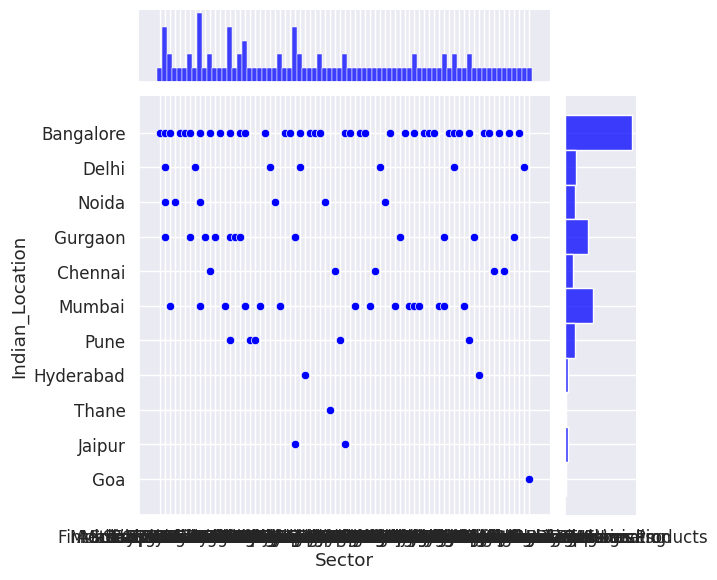

In [ ]:
# Plot
plt.figure(figsize = (20, 14))
sns.set(font_scale = 1.1)
sns.jointplot(data = df, x = 'Sector', y = 'Indian_Location', color = 'blue')

## Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [ ]:
df.columns

Index(['No.', 'Company', 'Sector', 'EntryValuation($B)', 'Valuation($B)',
       'Entry', 'Location', 'Select Investors', 'Indian_Location',
       'Profit/Loss', 'Ano'],
      dtype='object')

**Não houve uma alta correlação entre as variáveis, mas se tivesse ocorrido, teria que excluir das variáveis, utilizando o comando abaixo, para seguirmos com a construção do modelo de Machine Learning**


In [ ]:
# df = df.drop('', 1)

In [ ]:
df.shape

(102, 11)

In [ ]:
#  Variáveis de entrada (variáveis preditoras)
#X = df[[ 'EntryValuation($B)',
#        'Valuation($B)',
#         'Ano']]

In [ ]:
# Variáveis de entrada (variáveis preditoras)
X = df[[ 'Ano']]

In [ ]:
# Variável de saída (variável alvo ou target)
y = df['Profit/Loss']

In [ ]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
len(X_treino)

81

In [ ]:
len(X_teste)

21

### Padronização

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_treino)

StandardScaler()

In [ ]:
X_treino = scaler.transform(X_treino)

In [ ]:
X_teste = scaler.transform(X_teste)

In [ ]:
X_treino[:5]

array([[-2.70524442],
       [ 0.86501706],
       [ 0.41873437],
       [ 0.41873437],
       [ 0.41873437]])

In [ ]:
X_teste[:5]

array([[ 0.41873437],
       [-3.5978098 ],
       [ 0.41873437],
       [ 0.41873437],
       [ 0.86501706]])

###  Construção, Treinamento e Avaliação do Modelo 1 com Regressão Linear (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
# Cria o modelo
modelo_v1 = LinearRegression()

In [ ]:
# Treinamento
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [ ]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [-1.0871653]


In [ ]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
Ano,-1.087165


In [ ]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente']).corr()
df_coef

,Coeficiente
Coeficiente,NaN


A partir do lmplot e do coeficiente de correlação, podemos ver que o EntryValuation	e o Valuation	têm uma forte correlação positiva, ou seja, após um ano de investimento a empresa obteve lucro.


In [ ]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [ ]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([1.02871714, 5.39536458, 1.02871714, 1.02871714, 0.54353409,
       1.02871714, 0.54353409, 1.02871714, 0.54353409, 1.51390019])

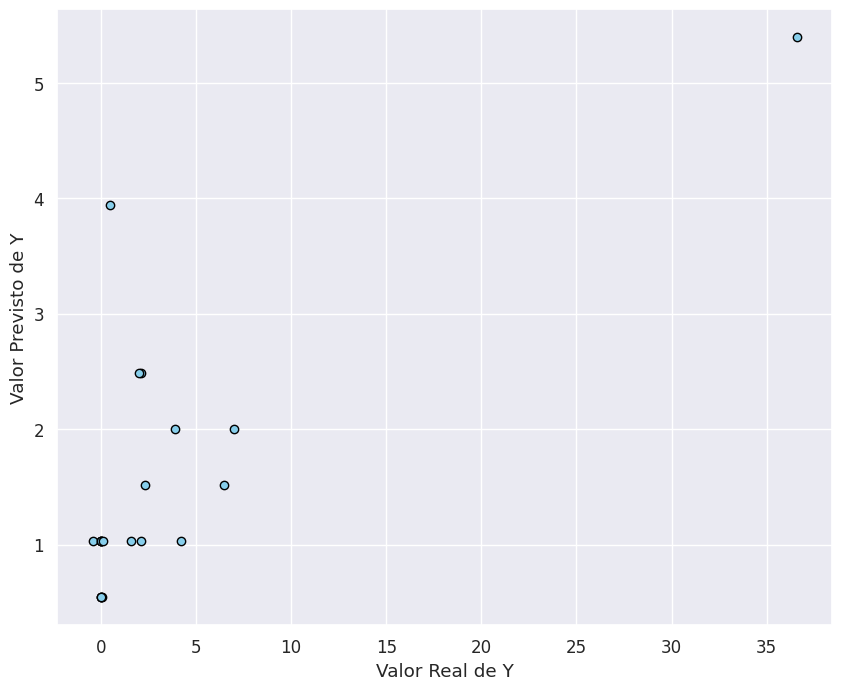

In [ ]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v1, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_teste, pred_v1)
print(f"Erro Quadrático Médio: {mse}")

Erro Quadrático Médio: 50.471762728388036


In [ ]:
# Valor atual
df['Valuation($B)'].mean()

3.3980196078431373

In [ ]:
# Valor mínimo
df['Valuation($B)'].min()

0.568

In [ ]:
# Valor máximo
df['Profit/Loss'].max()

36.6

In [ ]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

50.471762728388036

In [ ]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

7.104348156473473

In [ ]:
# Coeficiente R2
r2_score(y_teste, pred_v1)

0.15949056750816593

O coeficiente R2 de 1.0 e as outras métricas, demonstram que este é um modelo muito bom.

In [ ]:
# Variância Explicada
explained_variance_score(y_teste, pred_v1)

0.20784934239234665

<ipython-input-364-063e5990d82f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v1),


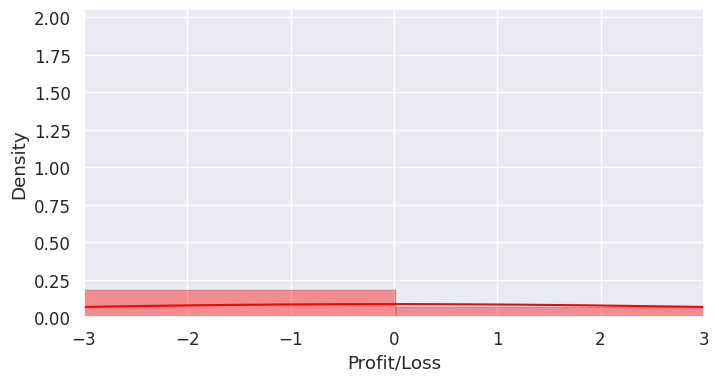

In [ ]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v1),
                  bins = 10,
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-3, 3))
ax.set(ylim = (0, 2.055));

In [ ]:
# Cria o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [ ]:
# Treinamento
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [ ]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [-1.07390719]


In [ ]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
Ano,-1.073907


In [ ]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([1.03426877, 5.34766441, 1.03426877, 1.03426877, 0.55500258,
       1.03426877, 0.55500258, 1.03426877, 0.55500258, 1.51353495])

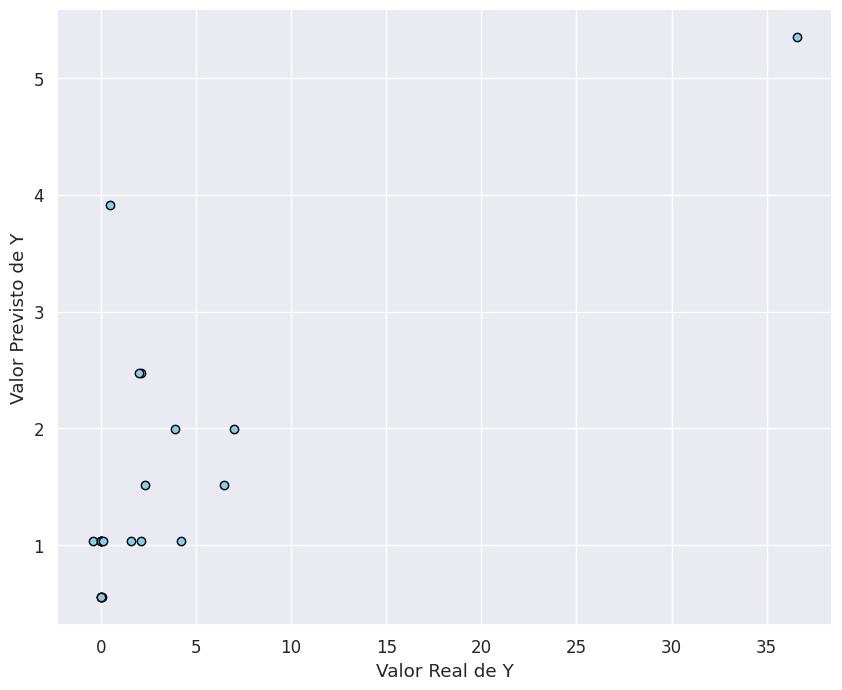

In [ ]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [ ]:
# MAE
mean_absolute_error(y_teste, pred_v2)

2.9365943122462035

In [ ]:
# MSE
mean_squared_error(y_teste, pred_v2)

50.610419315088684

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

7.114100035499128

In [ ]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.1571815106672907

In [ ]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.20559301239182537

In [ ]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
Ano,-1.087165


<ipython-input-376-0bc3932a9fe1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_teste - pred_v2),


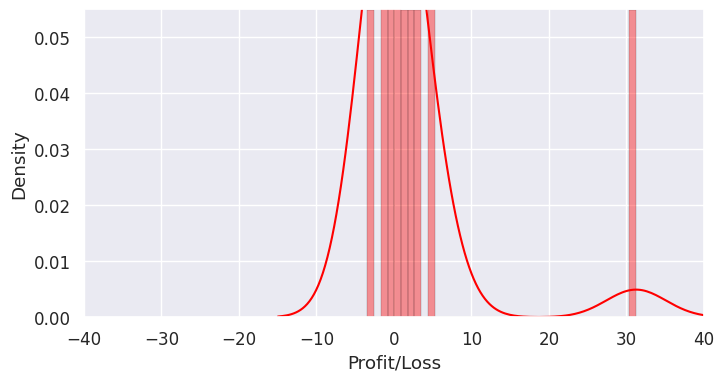

In [ ]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2),
                  bins = 40,
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Seleção do Modelo

Os modelos 1 e 2 ficaram próximos e nesse caso será escolhido o modelo mais simples, que é o modelo 2.

## Conclusão

In [ ]:
df.head()

,No.,Company,Sector,EntryValuation($B),Valuation($B),Entry,Location,Select Investors,Indian_Location,Profit/Loss,Ano
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",Bangalore,0.0,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",Bangalore,36.6,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,2013-02-01,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",Bangalore,0.5,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,2014-10-01,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",Delhi,0.6,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,2015-02-01,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",Noida,14.3,2015


In [ ]:
ano_futuro = 2022
lucro_previsto = modelo_v1.predict([[ano_futuro]])
print (lucro_previsto)

[-2196.76428458]


PREVISÃO DE LUCRO PARA AS EMPRESAS

In [ ]:
for empresa in df['Sector'].unique():
    df_empresa = df[df['Sector'] == empresa]

    if len(df_empresa) <= 1:
        continue  # Pule empresas com poucos dados para treinamento

    X_train, X_test, y_train, y_test = train_test_split(df_empresa[['Ano']], df_empresa['Profit/Loss'], test_size=0.2, random_state=42)

    # Criação e treinamento do modelo de regressão linear para cada empresa
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsão do lucro para o próximo ano para cada empresa
    ano_futuro = df_empresa['Ano'].max() + 1
    lucro_previsto = model.predict([[ano_futuro]])
    predictions.append({'Empresa': empresa, 'Lucro Previsto': lucro_previsto[0]})

# Mostrando as previsões de lucro para cada empresa
for prediction in predictions:
    print(f"Empresa: {prediction['Empresa']} - Lucro Previsto: {prediction['Lucro Previsto']:.2f}")


Empresa: E-Commerce - Lucro Previsto: -10.82
Empresa: SaaS - Analytics - Lucro Previsto: 0.50
Empresa: Foodtech - Lucro Previsto: 4.40
Empresa: Edtech - Lucro Previsto: -6.84
Empresa: SaaS - CRM - Lucro Previsto: 2.00
Empresa: Logistics Services - Lucro Previsto: -0.47
Empresa: E-Commerce - Groceries - Lucro Previsto: 0.90
Empresa: Gaming - Lucro Previsto: 0.00
Empresa: E-Commerce - Personal Care & Cosmetics - Lucro Previsto: 0.60
Empresa: Marketplace - Used Cars - Lucro Previsto: -2.00
Empresa: Fintech - Payments - Lucro Previsto: 6.50
Empresa: Fintech - General Insurance - Lucro Previsto: 2.10
Empresa: E-Commerce - Social Commerce - Lucro Previsto: 2.80
Empresa: Cryptocurrency Exchange - Lucro Previsto: 1.05
Empresa: D2C - Personal Care - Lucro Previsto: 0.00
Empresa: Aggregator - Consumer Brands - Lucro Previsto: 0.00
Empresa: Fintech - Credit Cards - Lucro Previsto: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

# Conclusão

Considerando todos os números fixos, sem considerar as variações financeiras, as empresas que obtiveram lucro no primeiro ano, tem previsão de crescimento conforme apresentado acima, porém as que não obtivera lucro no primeiro ano, terão saldo devedor no segundo.